<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Spark

---

![](https://snag.gy/ieVW98.jpg)

### Learning Objectives
*After this lesson, you will be able to:*
- Identify major data types used within Spark
- Basic data munging
- Work with SparkUI to evaluate "jobs"
- Use Spark via python

### Lesson Guide
- [What is spark?](#intro)
    - [Spark is a distributed framework for parallelized applications](#dist)
    - [Spark is an API](#api)
    - [Spark is machine learning](#ml)
    - [Spark is a framework for building high volume stream processors](#stream)
    - [Spark is a SQL interface](#sql)
    - [Spark is parallel graph processing](#graph)
- [Programming with Spark](#prog)
- [Spark UI](#sparkui)
- [Using Spark via Pyspark](#using)
    - [Spark installation guide](#guide)
    - [The spark context](#spark-context)
- [RDDs vs DataFrames](#rdd)
- [Transformations and Actions](#ta)
    - [Common Spark transformations](#common-transformations)
    - [Common Spark actions](#common-actions)
- [Spark data types](#dtypes)
    - [Resilient Distributed Dataset](#rdds)
    - [DataFrames](#df)
- [Common DataFrame operations and characteristics](#common-df)
- [Some basic stats in Spark](#stats)
- [Limiting results](#limiting)
- [More DataFrame and Series operations](#more-ops)
- [Activity: check out another dataset using Spark](#activity)
- [Practical tips](#practical-tips)

<a id='intro'></a>
## What is Spark?
---

**How is it different and similar to:**

- Hadoop
- Map reduce
- Random Forrests


### What is this, "Spark" you speak of?
![](https://snag.gy/4oxeiA.jpg)

### Spark is many things.  

- It's a set of tools for developing applications.  
- It's parallel processing of applications, in a distributed environment.

![](https://snag.gy/c9b1Kx.jpg)


<a id='dist'></a>
### Spark is a distributed computer framework for parallelized applications like _Hadoop_.

_Spark can interact with Hadoop's HDFS to access large amounts of data using high volume, distributed I/O._

![](https://snag.gy/s8gSlG.jpg)

<a id='api'></a>
### Spark is an API for handling large data tranformations like _Map Reduce_.

_It is a data transformation and selection tool like **Pandas**.  You can develop transformations through an API that allows you to chain operations together in a modular fashion, similar to **Pandas**._

![](https://snag.gy/9G4gJO.jpg)

> However, Spark delivers the idea of data manipulation through the framework of **transformations** and **actions**.  These transformations and actions are performed in parallel, using many different worker nodes (which may be distributed on multiple machines).

> Mapreduce is broken down into two main functions "map" and "reduce".  Spark on the other hand, operates through a set of operations determined through a **Directed Acyclic Graph** (or DAG for short).

<a id='ml'></a>
### Spark is machine learning like _Scikit Learn_.

![](https://snag.gy/RnuX6h.jpg)

_Spark provides an interface to MLib via Scala, Java, Python, and R.  The most common methods are provided such as regression, support vector machines, and random forrests, however, not all evaluation metrics are available in Python yet.  Spark is written in Scala, so features are prioritized to Scala first throughout the Spark ecosystem._

> <i class="fa fa-question-circe"></i> Anyone remember specific limitations? (You might not if you haven't done MLlib with Spark yet)

<a id='stream'></a>
### Spark is a framework for building high volume stream processors.
![](https://snag.gy/RCikuU.jpg)

With Spark streaming, it's possible to build a proccess that can respond to data in real-time, using any of Spark's features including Mlib, GraphX, or any kinds of transformations you could do within the Spark context.  The streaming capabilities of Spark core make it possible to prodice real-time applications such as ETL, analytics dashboards, data mining, or large scale aggregations.

In short, you can create a "streaming context" that listens on a specific port, and tie to to any number of operations that can be programed with spark.

>```python
># Save this as a file called "network_streaming.py"
>from pyspark import SparkContext
>from pyspark.streaming import StreamingContext
>
># Create a local StreamingContext with two working thread and batch interval of 1 second
>sc = SparkContext("local[2]", "NetworkWordCount")
>ssc = StreamingContext(sc, 1)
>
># Create a DStream that will connect to hostname:port, like localhost:9999
>lines = ssc.socketTextStream("localhost", 9999)
>
># Split each line into words
>words = lines.flatMap(lambda line: line.split(" "))
>
># Count each word in each batch
>pairs = words.map(lambda word: (word, 1))
>wordCounts = pairs.reduceByKey(lambda x, y: x + y)
>
># Print the first ten elements of each RDD generated in this DStream to the console
>wordCounts.pprint()
>
>ssc.start()             # Start the computation
>ssc.awaitTermination()  # Wait for the computation to terminate
>```

Then you can have Spark run this stream using the unix utility called **netcat** to route your service once you run spark-submit.

>```bash
>$ nc -lk 9999
>```

Running spark-submit launches applications onto your Spark cluster.

>```bash
>./bin/spark-submit examples/src/main/python/streaming/network_wordcount.py localhost 9999
>```

<a id='sql'></a>
### Spark is an SQL interface into dataframes like _Hive_.

Spark isn't actactly **Hive**, but it uses components from Hive.  However, you can use Spark dataframes easier to use with temporary SQL views.

>```python
># Load a dataset as a Spark DataFrame
>df = spark.read.csv("datasets/somedataset/hamburgers_eaten_per_hour.csv")
>df.createOrReplaceTempView("hamburgers")
>```



Then viola, you can slice and dice your dataframe as SQL:

>```python
>spark.sql("SELECT * FROM hamburgers").show()
>
># +------+---------+
># | eaten|     name|
># +------+---------+
># |null  |     Jeff|
># |  30  |   Kiefer|
># |  19  |     Hang|
># +------+---------+
>```

<a id='graph'></a>
### Spark is also parallel graph processing.

![](https://snag.gy/0KvrCw.jpg)

Graph processing provides the ability to process data in terms of relationships.  The area of applications where traditional RDBMS systems fail to provide involve calculating relationships between entities that don't have a predetermined depth between sets.  

Using graphs, you can represent irregular relationship shapes within data and apply functions recurvively and/or arbirarily on any depth of relationships.

Both RDBMS and Graphs can be abused to equate features of the other but each have their strengths and tradeoffs depending on application.


<a id='prog'></a>
## Programming with Spark
---

Running applications build with Spark has a variety of options:

- Pyspark
- spark-submit

### Pyspark
Pyspark is a real-time interpreter for Spark for Python.  You can integrate operations with the Spark Python libraries in real-time.  This is a great way to prototype applications much in the same way we do with Jupyter notebook.  It's also possible to connect Pyspark to Jupyter.

### Spark-submit
Spark-submit, on the other hand, is a way to run a set of application instructions bundled in a single file. It's possible to write these in Python, Scala, or Java.  Typically, it's convienient to prototype a set of operations that you want performed on a dataset with Pyspark, debug them to a high level of quality, then run them with Spark-submit.

> With spark-submit, it's also possible to tune the paramters in which your application will run to a very granular degree including memory, number of total cores, and specific cluster modes to control test vs production deployments.
>
> [Read more about submitting applications](http://spark.apache.org/docs/latest/submitting-applications.html).

<a id='sparkui'></a>
## Spark UI
---

Anytime a "spark context" is created, a cooresponding spark UI is launched.  Whenever you launch a Spark standalone instance, Pyspark, a Spark UI will be created.  Through the web UI, you can monitor how your applications run.  Anything that the Spark context handles, even the one line operations from PySpark can be observed as seperate jobs in Spark UI.

### Spark Jobs
![](https://snag.gy/JnuSKC.jpg)

### Job Metrics
![](https://snag.gy/JW2fOb.jpg)

<a id='using'></a>
## Using Spark via Pyspark
---

If you haven't done so yet, it's nice to be able to install Spark manually so you can get familliar with how to use it locally.  The advantage of this, as apposed to using a virtual machine, is that you should be able to run Spark without the overhead of an additional virtual operating system running on top of your already "actual" operating system.

<a id='guide'></a>
### Spark installation guide
> This is a good time to review or install Spark from our guide:
>
>Make sure you have scala 2.11 (scala on bash, tells you version, you can quit with :quit).
http://spark.apache.org/docs/2.1.0/ (installation instructions)
>
>Run to check you can access the shell: 
>./bin/spark-shell —master local[2]
>
>To omit the INFO logs, change conf log4j file from INFO to error and then cp to a file >without the .template
>Pip install findspark so we can easily point to our pyspark installation

<a id='spark-context'></a>
### Pyspark is all about "sc"

In [ ]:
# sc

**"sc"** represents your interface to a running spark cluster manager.  A Spark context is defined as a preconfigured cluster, an application name connected to it.  All **transformations** and **actions** performed by Spark, are handled through the Spark context (aka: **sc**).

>**Context for standalone Spark apps**
>
>If we where to write a standalone app for spark-submit, we would need to create the context manually.

>```python
>from pyspark import SparkContext
>sc = SparkContext("local", "Simple App")
>```

<img src="https://snag.gy/iCm4G1.jpg" width="600">

<a id='rdd'></a>
## RDDs vs DataFrames

---

The two main types of data objects in Spark are the **Resilient Distributed Dataset** and the **DataFrame**.  Both types represent data in a distributed state.  RDDs store data in a more primitive state such as a list of pairs, integers, floats, or strings.  DataFrames have a rich structure defintion called a **schema** much like a Pandas dataframe.

- You use **RDDs** to manage semi-structured data.
- You use **DataFrames** to operate on typed series.

Both RDDs and DataFrames can contain multiple types of objects.  **DataFrames** are much more constrained because data is represented by a 2 deminsional tabular structure where columns represent variables, and rows as observations.  **RDDs** are much more flexible if your data requires much less structure than a DataFrame while still being able to use _transformation_ methods such as **`map()`** and _action_ methods such as **`reduce()`**.

>_Distributed Data in Spark_
>![](https://snag.gy/vxVhri.jpg)

<a id='ta'></a>

## _Transformations_ and _Actions_

---

<a id='common-transformations'></a>
### <i class="fa fa-cogs" aria-hidden="true"></i> Common Spark transformations


Generally, **transformations** in Spark, modify data as new copies of whichever dataset that is used as input.  An analogy you will find the default docs talking about is _map_ as a **transformation**, and _reduce_ as an **action**.  **Transformations are lazy**, so no computations are performed until an **action** is requested.

<style>
.no-border:table, th, td {
    border: none;
    border-left: none;
    margin: 10px;
}
</style>

<table class="no-border" style="border: none;">
<tbody class="no-border" style="border: none;"><tr class="no-border" style=" background: #000000; color: #FFFFFF;"><th>Transformation</th><th style="border: none; text-align: center;">Meaning</th></tr>
<tr style="border-left: none; border-right: none;">
  <td style="border: none;"> <b>map</b>(<i>func</i>) </td>
  <td stye="border-right: none;"> Return a new distributed dataset formed by passing each element of the source through a function <i>func</i>. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>filter</b>(<i>func</i>) </td>
  <td style="border-right: none;"> Return a new dataset formed by selecting those elements of the source on which <i>func</i> returns true. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>sample</b>(<i>withReplacement</i>, <i>fraction</i>, <i>seed</i>) </td>
  <td style="border-right: none;"> Sample a fraction <i>fraction</i> of the data, with or without replacement, using a given random number generator seed. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>distinct</b>([<i>numTasks</i>])) </td>
  <td style="border-right: none;"> Return a new dataset that contains the distinct elements of the source dataset.</td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>groupByKey</b>([<i>numTasks</i>]) <a name="GroupByLink"></a> </td>
  <td style="border-right: none;"> When called on a dataset of (K, V) pairs, returns a dataset of (K, Iterable&lt;V&gt;) pairs. <br>
    <b>Note:</b> If you are grouping in order to perform an aggregation (such as a sum or
      average) over each key, using <code>reduceByKey</code> or <code>aggregateByKey</code> will yield much better
      performance.
    <br>
    <b>Note:</b> By default, the level of parallelism in the output depends on the number of partitions of the parent RDD.
      You can pass an optional <code>numTasks</code> argument to set a different number of tasks.
  </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>reduceByKey</b>(<i>func</i>, [<i>numTasks</i>]) <a name="ReduceByLink"></a> </td>
  <td style="border-right: none;"> When called on a dataset of (K, V) pairs, returns a dataset of (K, V) pairs where the values for each key are aggregated using the given reduce function <i>func</i>, which must be of type (V,V) =&gt; V. Like in <code>groupByKey</code>, the number of reduce tasks is configurable through an optional second argument. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>aggregateByKey</b>(<i>zeroValue</i>)(<i>seqOp</i>, <i>combOp</i>, [<i>numTasks</i>]) <a name="AggregateByLink"></a> </td>
  <td style="border-right: none;"> When called on a dataset of (K, V) pairs, returns a dataset of (K, U) pairs where the values for each key are aggregated using the given combine functions and a neutral "zero" value. Allows an aggregated value type that is different than the input value type, while avoiding unnecessary allocations. Like in <code>groupByKey</code>, the number of reduce tasks is configurable through an optional second argument. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>sortByKey</b>([<i>ascending</i>], [<i>numTasks</i>]) <a name="SortByLink"></a> </td>
  <td style="border-right: none;"> When called on a dataset of (K, V) pairs where K implements Ordered, returns a dataset of (K, V) pairs sorted by keys in ascending or descending order, as specified in the boolean <code>ascending</code> argument.</td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>join</b>(<i>otherDataset</i>, [<i>numTasks</i>]) <a name="JoinLink"></a> </td>
  <td style="border-right: none;"> When called on datasets of type (K, V) and (K, W), returns a dataset of (K, (V, W)) pairs with all pairs of elements for each key.
    Outer joins are supported through <code>leftOuterJoin</code>, <code>rightOuterJoin</code>, and <code>fullOuterJoin</code>.
  </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>pipe</b>(<i>command</i>, <i>[envVars]</i>) </td>
  <td style="border-right: none;"> Pipe each partition of the RDD through a shell command, e.g. a Perl or bash script. RDD elements are written to the
    process's stdin and lines output to its stdout are returned as an RDD of strings. </td>
</tr>
</tbody></table>

> <i class="fa fa-info-circle" aria-hidden="true"></i> For more info on **transformations**, check out the [<i class="fa fa-external-link" aria-hidden="true"></i> Spark programming guide on #trasformations](http://spark.apache.org/docs/latest/programming-guide.html#transformations)

> A great visual guide for common Spark transformations is available by [<i class="fa fa-external-link" aria-hidden="true"></i> Jeff Thompson @ Databricks](http://training.databricks.com/visualapi.pdf)




<a id='common-actions'></a>
### <i class="fa fa-wrench" aria-hidden="true"></i> Common Spark Actions

Spark **actions** are not performed until they are called (like a function) -- common sense right?  Careful, because in _Pandas_ we're accustomed to getting results as a result of most transformations performed.  So, if we have a few operations programmed out, nothing will actually be transformed until we call an **action**.

```python
# 1. Read text file
#########
# This line reads a text file from the filesystem.  Each line becomes an element in a list-like object (RDD).
# No operations have been done as of yet.  We don't know if the text file actually exists or read any data.
#############################################################################################################

text_lines = sc.textFile("somefile.txt")

# 2. Map lengths of each line
#########
# Once data is available, we simply count the length of lines (length of string), and create a new RDD 
# which only has the length of each line as a new object.
#############################################################################################################

text_line_lengths = text_lines.map(lambda s: len(s))

# 3. Reduce to find total sum of lengths
#########
# Once reduce is called, all prior operations are run.  Meaning, we actually sc.textFile(), 
# and text_lines.Map(), before finally text_line_lengths.reduce() is ran.
#############################################################################################################

total_length = text_line_lengths.reduce(lambda a, b: a + b)
```

<table class="table" style="border-left: none; border-right: none;">
<tbody style="border-left: none;"><tr style="background: black; color: white;"><th>Action</th><th style="text-align: center;">Meaning</th></tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>reduce</b>(<i>func</i>) </td>
  <td style="border-right: none;"> Aggregate the elements of the dataset using a function <i>func</i> (which takes two arguments and returns one). The function should be commutative and associative so that it can be computed correctly in parallel. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>collect</b>() </td>
  <td style="border-right: none;"> Return all the elements of the dataset as an array at the driver program. This is usually useful after a filter or other operation that returns a sufficiently small subset of the data. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>count</b>() </td>
  <td style="border-right: none;"> Return the number of elements in the dataset. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>first</b>() </td>
  <td style="border-right: none;"> Return the first element of the dataset (similar to take(1)). </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>take</b>(<i>n</i>) </td>
  <td style="border-right: none;"> Return an array with the first <i>n</i> elements of the dataset. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>takeSample</b>(<i>withReplacement</i>, <i>num</i>, [<i>seed</i>]) </td>
  <td style="border-right: none;"> Return an array with a random sample of <i>num</i> elements of the dataset, with or without replacement, optionally pre-specifying a random number generator seed.</td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>takeOrdered</b>(<i>n</i>, <i>[ordering]</i>) </td>
  <td style="border-right: none;"> Return the first <i>n</i> elements of the RDD using either their natural order or a custom comparator. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>saveAsTextFile</b>(<i>path</i>) </td>
  <td style="border-right: none; border-right: none;"> Write the elements of the dataset as a text file (or set of text files) in a given directory in the local filesystem, HDFS or any other Hadoop-supported file system. Spark will call toString on each element to convert it to a line of text in the file. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>countByKey</b>() <a name="CountByLink"></a> </td>
  <td style="border-right: none;"> Only available on RDDs of type (K, V). Returns a hashmap of (K, Int) pairs with the count of each key. </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none;"> <b>foreach</b>(<i>func</i>) </td>
  <td style="border-right: none;"> Run a function <i>func</i> on each element of the dataset. This is usually done for side effects such as updating an <a href="#accumulators">Accumulator</a> or interacting with external storage systems.
  <br><b>Note</b>: modifying variables other than Accumulators outside of the <code>foreach()</code> may result in undefined behavior. See <a href="#understanding-closures-a-nameclosureslinka">Understanding closures </a> for more details.</td>
</tr>
</tbody></table>

> <i class="fa fa-info-circle" aria-hidden="true"></i> For more info on **actions**, check out the [<i class="fa fa-external-link" aria-hidden="true"></i> Spark programming guide on #actions](http://spark.apache.org/docs/latest/programming-guide.html#actions)

# <i class="fa fa-question-circle" aria-hidden="true"></i>  How might you approach programming with Spark vs Pandas?

_Given that operations are "lazy"?_

<a id='dtypes'></a>
## Spark data types
---

### RDD's

It's best to think of RDDs as primitive objects that are distributed.  RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.  The RDD type is the oldest type and has been around the Spark codebase since the version 1.0 days.

> Neat trick:  Since RDDs can be Python class types, it's possible to do things like run scikit-learn's `GridSearch` over an existing scikit model and paramter search over a massive amount of permutations in a clustered Spark setup.

### DataFrames

As part of the "Tungsten Initiative", which sought to improve the performance of Spark, DataFrames entered the Spark codebase in version 1.3.  The big difference between RDD's and DataFrames, is that DataFrames introduce the idea of a "schema" much like Pandas.  

<a id='rdds'></a>
<span style="font-size: 25pt; font-weight: light;"><strong>R</strong>eslient <strong>D</strong>istributed <strong>D</strong>ataset</span>
<hr>


Everything in Spark revolves around the **RDD**.

> "..a fault-tolerant collection of elements that can be operated on in parallel..."
> _-Spark Documentation_

Most datasets that can be loaded externally (csv, HDFS/hadoop, text files, RDBMS/SQL, etc), become an RDD and thus operated on in parallel within a distruted system (Spark!).  Otherwise, you can `sc.parallelize(my_data)` a dataset through a Spark context (aka a driver program as it's sometimes called).

> Check out this Gridsearch with Spark package on [<i class="fa fa-external-link" aria-hidden="true"></i> Github: spark-sklearn](https://github.com/databricks/spark-sklearn)

<a id='df'></a>
### DataFrames

The big plus is that Spark DataFrames serializes its data at a lower level to native Java/Scala, so when it's passed between nodes, it's much more performant, requiring fewer processes to handle computations.  Mainly data can be processed faster when it's optimized to a common format [the schema] that Spark doesn't have to convert to in order to perform tasks on it.

Outside of the performance optimizations introduced with a schema-based datastructure, the **DataFrame API** provides a convinient set of selectors for transforming data, much like Pandas.  Lastly, it's possible to create temporary views in which **DataFrames** can be queried with SQL - **SparkSQL**.

In [3]:
import findspark
findspark.init("/Users/Alistair/spark-2.3.0-bin-hadoop2.7")

import pyspark
sc = pyspark.SparkContext("local", appName="myAppName")
spark = pyspark.sql.SparkSession(sc)

Exception: Java gateway process exited before sending the driver its port number

In [5]:
df = spark.read.csv(
    path        =   "datasets/sentiment_words_simple.csv",
    header      =   True, 
    mode        =   "DROPMALFORMED",   # Poorly formed rows in CSV are dropped rather than erroring entire operation
    inferSchema =   True               # Not always perfect but works well in most cases as of 2.1+
)

NameError: name 'spark' is not defined

In [4]:
df.printSchema()

root
 |-- pos: string (nullable = true)
 |-- word: string (nullable = true)
 |-- pos_score: double (nullable = true)
 |-- neg_score: double (nullable = true)



<a id='common-df'></a>
## Common DataFrame operations and characteristics
---

Let's have a look at some familliar and new functions and properties.

### Inspect variable / column space of a DataFrame

In [5]:
df.columns

['pos', 'word', 'pos_score', 'neg_score']

### DTypes
Inspect schema programatically.

In [6]:
df.dtypes

[('pos', 'string'),
 ('word', 'string'),
 ('pos_score', 'double'),
 ('neg_score', 'double')]

### Explain DataFrame
Show details about DataFrame type, schema, and origin of data.

In [7]:
df.explain()

== Physical Plan ==
*(1) FileScan csv [pos#10,word#11,pos_score#12,neg_score#13] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/cave/Desktop/dsi/ga/dat21/lesson17/intro_to_spark/datasets/sentimen..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<pos:string,word:string,pos_score:double,neg_score:double>


### Describe
Describe will look similar to synonymous Pandas **Describe** function

In [8]:
df.describe().show()

+-------+------+--------------------+-------------------+-------------------+
|summary|   pos|                word|          pos_score|          neg_score|
+-------+------+--------------------+-------------------+-------------------+
|  count|155287|              155287|             155287|             155287|
|   mean|  null| 5.687506389495568E9|0.03865380738372139|0.05048873043068892|
| stddev|  null|7.537744261701462E10|0.11118246263109259| 0.1392276319041252|
|    min|   adj|               'hood|                0.0|                0.0|
|    max|  verb|              zyrian|                1.0|                1.0|
+-------+------+--------------------+-------------------+-------------------+



In [9]:
## Check Pandas version here!!!
df.toPandas().describe()

,pos_score,neg_score
count,155287.000000,155287.000000
mean,0.038654,0.050489
std,0.111182,0.139228
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


### printSchema
The schema is a very import characteristic of a Spark DataFrame.  It tells us what's possible in terms of transformation.  Also, it's the reason DataFrames are so fast since they are typed to a set number of types that are serialized and optimized in Java/Scala behind the scenes.

><i class="fa fa-exclamation-triangle" aria-hidden="true"></i> The "schema" that we've been so excited to see is finally here to explore.  Feel free to take a screenshot and show your friends.

In [10]:
df.printSchema()

root
 |-- pos: string (nullable = true)
 |-- word: string (nullable = true)
 |-- pos_score: double (nullable = true)
 |-- neg_score: double (nullable = true)



### Count
Count with caveat:  This will return the count of all rows, including _non-NaN_ values.  Pandas will omit these.

In [11]:
df.count()

155287

<a id='stats'></a>
## Some basic stats in spark
---

### Covariance
<span style="font-size: 20pt;">
$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$
</span>
> "Covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, i.e., the variables tend to show similar behavior, the covariance is positive."

In [12]:
df.cov("pos_score", "neg_score")

0.0019032076361625806

### Pearson Score
<span style="font-size: 20pt;">
$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} $
</span>
> The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

In [13]:
df.corr("pos_score", "neg_score")

0.12294884293406051

<a id='limiting'></a>
## Limiting results

---

### Head

In [14]:
df.head(5) # all the data is loaded into an instances memory -- use for small datasets

[Row(pos='adj', word='.22-caliber', pos_score=0.0, neg_score=0.0),
 Row(pos='adj', word='.22-calibre', pos_score=0.0, neg_score=0.0),
 Row(pos='adj', word='.22_caliber', pos_score=0.0, neg_score=0.0),
 Row(pos='adj', word='.22_calibre', pos_score=0.0, neg_score=0.0),
 Row(pos='adj', word='.38-caliber', pos_score=0.0, neg_score=0.0)]

### Show limited results

With Pandas we're used to the `df.head()` as a first step in exploring a dataset.  With Spark this isn't exactly the same.  You need to use the `df.show()`, operation in order to explore data as a first step.  Where Pandas formats its DataFrame output for display in nice HTML tables with sensible defaults for output, you have have to be a bit more specific about what you're looking at with `show()` when using Spark.


> The paramters `truncate` is helpful for truncating attributes for display.

In [15]:
df.show(6)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|.22-caliber|      0.0|      0.0|
|adj|.22-calibre|      0.0|      0.0|
|adj|.22_caliber|      0.0|      0.0|
|adj|.22_calibre|      0.0|      0.0|
|adj|.38-caliber|      0.0|      0.0|
|adj|.38-calibre|      0.0|      0.0|
+---+-----------+---------+---------+
only showing top 6 rows



In [16]:
df.show(5, truncate=8)

+---+--------+---------+---------+
|pos|    word|pos_score|neg_score|
+---+--------+---------+---------+
|adj|.22-c...|      0.0|      0.0|
|adj|.22-c...|      0.0|      0.0|
|adj|.22_c...|      0.0|      0.0|
|adj|.22_c...|      0.0|      0.0|
|adj|.38-c...|      0.0|      0.0|
+---+--------+---------+---------+
only showing top 5 rows



In [17]:
df.limit(19).show() 
#`show()` can also be chained to certain outputs like `limit`.  
#`show` by itself is a compound operation for displaying data.

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|.22-caliber|      0.0|      0.0|
|adj|.22-calibre|      0.0|      0.0|
|adj|.22_caliber|      0.0|      0.0|
|adj|.22_calibre|      0.0|      0.0|
|adj|.38-caliber|      0.0|      0.0|
|adj|.38-calibre|      0.0|      0.0|
|adj|.38_caliber|      0.0|      0.0|
|adj|.38_calibre|      0.0|      0.0|
|adj|.45-caliber|      0.0|      0.0|
|adj|.45-calibre|      0.0|      0.0|
|adj|.45_caliber|      0.0|      0.0|
|adj|.45_calibre|      0.0|      0.0|
|adj|          0|      0.0|      0.5|
|adj|          1|      0.0|     0.25|
|adj|         10|      0.0|      0.0|
|adj|10-membered|      0.0|      0.0|
|adj|        100|      0.0|      0.0|
|adj|       1000|      0.0|      0.0|
|adj|     1000th|      0.0|      0.0|
+---+-----------+---------+---------+



### <i class="fa fa-question-circle" aria-hidden="true"></i> Why should you need to be careful when displaying data in Spark?

Hopefully you can see why Pandas is so nice to use for EDA.

<a id='more-ops'></a>
## More DataFrame and Series operations
---

### Convert from list of Row objects to list of dictionaries

In [18]:
[row.asDict() for row in df.take(10)]

[{'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.22-caliber'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.22-calibre'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.22_caliber'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.22_calibre'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.38-caliber'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.38-calibre'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.38_caliber'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.38_calibre'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.45-caliber'},
 {'neg_score': 0.0, 'pos': 'adj', 'pos_score': 0.0, 'word': '.45-calibre'}]

### Selecting DataFrame Series

Selecting variables with Spark **DataFrames API** works very similliarly to Pandas DataFrames.  When selecting variables in Pandas use use a `list` object, passed to a DataFrame object via `[]` brackets like so:

>```df[['col1', 'col2']]```

The equivalent in spark is using the `.select()` method which takes flat parameters.

> <i class="fa fa-info-circle" aria-hidden="true"></i> DataFrames in Pandas are implemented with an overloaded brackets operator so whenever we reference any Pandas DataFrames object with brackets, it get's passed down to a function that handles the column references (as a list), as the input to a function.

#### Select all features / variables / columns

In [19]:
df.select(df.columns)

DataFrame[pos: string, word: string, pos_score: double, neg_score: double]

In [20]:
df.select(df.columns).show(5)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|.22-caliber|      0.0|      0.0|
|adj|.22-calibre|      0.0|      0.0|
|adj|.22_caliber|      0.0|      0.0|
|adj|.22_calibre|      0.0|      0.0|
|adj|.38-caliber|      0.0|      0.0|
+---+-----------+---------+---------+
only showing top 5 rows



#### Select specific features / variables / columns

In [21]:
df.select("word", "pos_score").show()

+-----------+---------+
|       word|pos_score|
+-----------+---------+
|.22-caliber|      0.0|
|.22-calibre|      0.0|
|.22_caliber|      0.0|
|.22_calibre|      0.0|
|.38-caliber|      0.0|
|.38-calibre|      0.0|
|.38_caliber|      0.0|
|.38_calibre|      0.0|
|.45-caliber|      0.0|
|.45-calibre|      0.0|
|.45_caliber|      0.0|
|.45_calibre|      0.0|
|          0|      0.0|
|          1|      0.0|
|         10|      0.0|
|10-membered|      0.0|
|        100|      0.0|
|       1000|      0.0|
|     1000th|      0.0|
|      100th|      0.0|
+-----------+---------+
only showing top 20 rows



#### Series Operations

With Pandas, you can easily create a new series that's the sum of every row in **"col1"**, to **"col2"** like so:

> `df['col1'] + df['col2']`

In Spark, we have to do this through the select function.

In [22]:
df.select(df["pos_score"] + df["neg_score"]).show(15)

+-----------------------+
|(pos_score + neg_score)|
+-----------------------+
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.0|
|                    0.5|
|                   0.25|
|                    0.0|
+-----------------------+
only showing top 15 rows



In [23]:
df.select(df["pos_score"] + 10).show(15) ## We can also do math operations in series as well

+----------------+
|(pos_score + 10)|
+----------------+
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
|            10.0|
+----------------+
only showing top 15 rows



#### As an "alias"
As selections are keyed by conditions, they can become hard to read.  We can use an "alias" to abstract any selections.

In [42]:
df.select((df["pos_score"] + df["neg_score"]).alias("total_score")).show(15)

+-----------+
|total_score|
+-----------+
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.5|
|       0.25|
|        0.0|
+-----------+
only showing top 15 rows



#### Creating new features / variables / columns

In [24]:
df.select(df['pos_score'] + df['neg_score'])
df.withColumn("new_column", df['pos_score'] + df['neg_score']).show(15)

+---+-----------+---------+---------+----------+
|pos|       word|pos_score|neg_score|new_column|
+---+-----------+---------+---------+----------+
|adj|.22-caliber|      0.0|      0.0|       0.0|
|adj|.22-calibre|      0.0|      0.0|       0.0|
|adj|.22_caliber|      0.0|      0.0|       0.0|
|adj|.22_calibre|      0.0|      0.0|       0.0|
|adj|.38-caliber|      0.0|      0.0|       0.0|
|adj|.38-calibre|      0.0|      0.0|       0.0|
|adj|.38_caliber|      0.0|      0.0|       0.0|
|adj|.38_calibre|      0.0|      0.0|       0.0|
|adj|.45-caliber|      0.0|      0.0|       0.0|
|adj|.45-calibre|      0.0|      0.0|       0.0|
|adj|.45_caliber|      0.0|      0.0|       0.0|
|adj|.45_calibre|      0.0|      0.0|       0.0|
|adj|          0|      0.0|      0.5|       0.5|
|adj|          1|      0.0|     0.25|      0.25|
|adj|         10|      0.0|      0.0|       0.0|
+---+-----------+---------+---------+----------+
only showing top 15 rows



## <i class="fa fa-question-circle"></i> Have we changed the original DataFrame?

#### Filtering Data
In Pandas we use "masks" through dataframe object brackets in order to filter data.
>`df[df['feature'] > 0]`

In Spark, we use the `filter()` method to select different aspects of our data.

In [25]:
df.filter(df["pos_score"] > .5).show(5)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|      a-one|    0.625|      0.0|
|adj|   abatable|    0.625|      0.0|
|adj|abolishable|    0.625|      0.0|
|adj|   absolved|    0.625|      0.0|
|adj|        ace|    0.625|      0.0|
+---+-----------+---------+---------+
only showing top 5 rows



#### Multiple conditions
SAME AS PANDAS!  Thankfully, we don't have to leave our comfort zone with too many oddities here.

In [26]:
df.filter((df["pos_score"] > .5) & (df["neg_score"] > 0)).show(5)

+---+-------------+--------------+---------------+
|pos|         word|     pos_score|      neg_score|
+---+-------------+--------------+---------------+
|adj|    adjustive|         0.625|          0.125|
|adj|adventuresome|         0.625|           0.25|
|adj|  adventurous|         0.625|           0.25|
|adj|  affirmative|0.583333333333|0.0416666666667|
|adj|all-important|          0.75|          0.125|
+---+-------------+--------------+---------------+
only showing top 5 rows



In [27]:
df \
.filter(df["pos_score"] > .5) \
.filter(df["neg_score"] > 0).show(5) # Filters can be chained per line using the \ newline escape sequence character

+---+-------------+--------------+---------------+
|pos|         word|     pos_score|      neg_score|
+---+-------------+--------------+---------------+
|adj|    adjustive|         0.625|          0.125|
|adj|adventuresome|         0.625|           0.25|
|adj|  adventurous|         0.625|           0.25|
|adj|  affirmative|0.583333333333|0.0416666666667|
|adj|all-important|          0.75|          0.125|
+---+-------------+--------------+---------------+
only showing top 5 rows



#### Filter as an expression
Pandas has a similar function called "where".  However, with Spark `filter`, we can filter by shorthand expressions when referencing column sequences.

In [28]:
df.filter("pos_score > .5").show(5)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|      a-one|    0.625|      0.0|
|adj|   abatable|    0.625|      0.0|
|adj|abolishable|    0.625|      0.0|
|adj|   absolved|    0.625|      0.0|
|adj|        ace|    0.625|      0.0|
+---+-----------+---------+---------+
only showing top 5 rows



In [29]:
condition = """
pos_score > .5 AND 
neg_score > 0 
"""

df.filter(condition).show(5)

+---+-------------+--------------+---------------+
|pos|         word|     pos_score|      neg_score|
+---+-------------+--------------+---------------+
|adj|    adjustive|         0.625|          0.125|
|adj|adventuresome|         0.625|           0.25|
|adj|  adventurous|         0.625|           0.25|
|adj|  affirmative|0.583333333333|0.0416666666667|
|adj|all-important|          0.75|          0.125|
+---+-------------+--------------+---------------+
only showing top 5 rows



### Sorting

In [30]:
df.sort(df.neg_score.desc()).show(5)

+----+----------+---------+---------+
| pos|      word|pos_score|neg_score|
+----+----------+---------+---------+
| adj| cheapjack|      0.0|      1.0|
| adj| henpecked|      0.0|      1.0|
| adj|lamentable|      0.0|      1.0|
|noun| angriness|      0.0|      1.0|
|noun|blackguard|      0.0|      1.0|
+----+----------+---------+---------+
only showing top 5 rows



In [31]:
df.sort(df.pos_score.desc()).show(5)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|  excellent|      1.0|      0.0|
|adj| top-flight|      1.0|      0.0|
|adj|fantabulous|      1.0|      0.0|
|adj|first-class|      1.0|      0.0|
|adj|  homologic|      1.0|      0.0|
+---+-----------+---------+---------+
only showing top 5 rows



In [32]:
df.filter("pos_score > .5 AND pos_score < 1.0 AND neg_score > 0") \
.sort(df.pos_score.desc(), df.neg_score.desc()) \
.show(5)

+---+-------------+---------+---------+
|pos|         word|pos_score|neg_score|
+---+-------------+---------+---------+
|adj|        awing|    0.875|    0.125|
|adj|          fab|    0.875|    0.125|
|adj|straightarrow|    0.875|    0.125|
|adj|    gladdened|    0.875|    0.125|
|adj|      awesome|    0.875|    0.125|
+---+-------------+---------+---------+
only showing top 5 rows



In [33]:
df.filter("pos_score > .5 AND pos_score < 1.0 AND neg_score > 0") \
.sort(df.pos_score.asc(), df.neg_score.desc()) \
.show(5)

+----+------------+--------------+--------------+
| pos|        word|     pos_score|     neg_score|
+----+------------+--------------+--------------+
| adj|   bona_fide|        0.5125|           0.3|
| adj|   authentic|        0.5125|           0.3|
| adj|      hearty|         0.525|          0.05|
| adj|prophylactic|0.527666666667|0.222333333333|
|noun|        joke|       0.53125|        0.1875|
+----+------------+--------------+--------------+
only showing top 5 rows



## AS SQL!?


Working with DataFrames as SQL is as easy as creating a **temporary view**.

In [34]:
df.createOrReplaceTempView("sentiment")

In [35]:
sentiment = spark.sql("SELECT * FROM sentiment LIMIT 100")
sentiment.show(5)

+---+-----------+---------+---------+
|pos|       word|pos_score|neg_score|
+---+-----------+---------+---------+
|adj|.22-caliber|      0.0|      0.0|
|adj|.22-calibre|      0.0|      0.0|
|adj|.22_caliber|      0.0|      0.0|
|adj|.22_calibre|      0.0|      0.0|
|adj|.38-caliber|      0.0|      0.0|
+---+-----------+---------+---------+
only showing top 5 rows



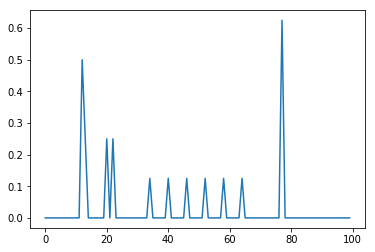

In [36]:
%matplotlib inline

sentiment.toPandas()['neg_score'].plot()

### Temporary Views select DataFrames
So the same transformations can be applied to DataFrames as we just learned.

In [37]:
sentiment.describe().show()

+-------+----+------------------+---------+-------------------+
|summary| pos|              word|pos_score|          neg_score|
+-------+----+------------------+---------+-------------------+
|  count| 100|               100|      100|                100|
|   mean|null|  96.9090909090909|      0.0|            0.02625|
| stddev|null|154.37463012769066|      0.0|0.09282158132458183|
|    min| adj|       .22-caliber|      0.0|                0.0|
|    max| adj|              29th|      0.0|              0.625|
+-------+----+------------------+---------+-------------------+



<a id='activity'></a>
## Activity:  Check out another dataset using Spark DataFrames

#### 1. Load up the "Pokemon" basic Pokedex dataset
First try without infering the schema and without the header.

In [40]:
df = spark.read.csv("./datasets/pokedex_basic.csv", inferSchema=False, header=False)
df.describe().show(truncate=5)

+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|summary|  _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9|
+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|  count|  801|  801|  801|  801|  801|  801|  801|  801|  801|  801|
|   mean|36...| null| null|43...|69...|79...|73...|72.82|71...|68...|
|  st...|20...| null| null|11...|25...|32...|31...|32...|27...|29...|
|    min|  001|Ab...|  Bug|  180|    1|   10|   10|   10|  100|   10|
|    max|Po...|Zy...|Wa...|Total|   HP|At...|De...|Sp...|Sp...|Speed|
+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+



#### 2. Check out the dataset with infer schema paramter but without header.
How does it work with / without?

In [ ]:
#

#### 3.  Create a tempory view with the Pokedex DataFrame called "pokemon"
Then 
```sql SELECT * FROM pokemon LIMIT 10```

In [ ]:
#

#### 4.a Which is the strongest Pokemon by `Type`?
Using Spark DataFrame operations.  Research Sparks "grouping" functions.

In [ ]:
#

#### 4.b Which is the strongest Pokemon by Type?
Using the Spark SQL temporary view.

In [ ]:
#

#### 5.a Which Pokemon has the best combined Attack and Defence?
Using Spark DataFrame operations.

In [ ]:
#

#### 5.b Which Pokemon has the best combined Attack and Defence?
Using the Spark SQL temporary view.

In [ ]:
#

#### 6. Create a new feature called "Pokevalue" that is the combined Attack, Defence and scaled by .2 of the Pokemon HP.

Use any means necessary to solve this problem.

In [ ]:
#

<a id='practical-tips'></a>
# <i class="fa fa-thumbs-up" aria-hidden="true"></i> Practical tips
---

### Sampling from enormous datasets
Undoubtably, you may have the need to examine a larger dataset.  A common operation is to take a sample.  To approximate the characteristics of your global distribution, you should try to adjust the size that best matches the metrics of central tendency or consider doing a power analysis to determine sample sizing.

> Size of your sample generally depends on your application be it A/B testing, EDA, Machine Learning, etc.

In [41]:
sampled = df.sample(
    withReplacement = False, # Unique samples
    fraction        = .2,    # Approximate size of sample
    seed            = 42     # Similar to scikit's randomState paramter.  Ideal for sharing results.
)

print ("Sampled: %d, Global: %d" % (sampled.count(), df.count()))

Sampled: 160, Global: 801


In [ ]:
df.describe().show()

In [ ]:
sampled.describe().show()